# ADS, fall 2017. Homework 3

### Q1 (10 points). P-values and hypothesis testing
Suppose that a multiple regression with 10 regressors gave the following p-values for each of them (the value below are NOT in percents yet):

0.02, 0.1, 3e-15, 0.5, 0.04, 0.001, 0.06, 0.03, 0.045, 5e-3.

For how many regressors you would reject the null-hypothesis that their corresponding regression coefficient is zero? Please explain.

**Answer:**
7, if we are using 0.05 as our threshold, we would reject the null hypothesis for values below 0.05; there are 7 such values in this sample. 

### Q2 (15 points). Confidence intervals
Assume we perform a regression and get an estimate 100 for the slope coefficient for the regressor of interest. Select all statements that can not be true for its confidence intervals:

a. 99%-conficence interval is [99.99,100.01]

b. 95%-confidence interval is [-300, 300]

c. 98%-confidence interval is [95, 105], while 90%-confidence interval is [90, 110].

d. 99%-confidence interval is [99,100]

Explain your choices

**Answer:**<br>B cannot be, as it is not evenly distributed around 100 (300 is 200 above, while -300 is 400 below)<br>
C cannot be either, as the 98% confidence interval is inside the 90% confidence interval, which is impossible, as a greater interval is necessarily greater than or equal to a smaller one. <br>
D cannot be a confidence interval, either, as it includes the estimate on the right, but has a different value on the left, meaning it runs into the same issue as B, in that it is not normally distributed.

### Q3 (15 points). 

A linear regression model is fit over a dataset with 181 observations and 'n' features. The estimate for the regression coefficient for one of the features is 911.0964 while its standard error is 344.185.

What will be the 
a) 95, 99 and 90% confidence intervals? 
b) p-values?

In [50]:
import scipy.stats as sp

In [1]:
import numpy as np
from __future__ import division, print_function
conf99 = 2.576
conf95 = 1.96
conf90 = 1.645

conf_90 = (round(911.0964 - conf90 * (344.185),5), 
           round(911.0964 + conf90 * (344.185),5))
print('90% confidence:',conf_90, '  p-value: 0.1')

conf_95 = (round(911.0964 - conf95 * (344.185),5), 
           round(911.0964 + conf95 * (344.185),5))
print('95% confidence:',conf_95, '     p-value: 0.05')

conf_99 = (round(911.0964 - conf99 * (344.185),5), 
           round(911.0964 + conf99 * (344.185),5))
print('99% confidence:',conf_99, '   p-value: 0.01')


90% confidence: (344.91207, 1477.28073)   p-value: 0.1
95% confidence: (236.4938, 1585.699)      p-value: 0.05
99% confidence: (24.47584, 1797.71696)    p-value: 0.01


### Q4.(ACS Data Set, 30pts)

We'll be using the ACS dataset provided below.

Survey:           ACS 2015 (5-Year Estimates)
Dataset:          Social Explorer Tables:  ACS 2015 (5-Year Estimates)

**VARIABLE DESCRIPTIONS:** (Data was collected in 2015)

Tables:

      1. Population Density (per Sq. Mile)
         Universe:  Total Population
         Name:      T2
         Variables:
            T002_001:   Total Population
            T002_002:   Population Density (Per Sq. Mile)
            T002_003:   Area (Land)


      2. Average Household Size
         Universe:  Occupied Households
         Name:      T21
         Variables:
            T021_001:   Average Household Size



      3. Median Household Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Households
         Name:      T57
         Variables:
            T057_001:   Median Household Income (In 2015 Inflation Adjusted Dollars)


      4. Per Capita Income (In <DollarYear> Inflation Adjusted Dollars)
         Universe:  Total Population
         Name:      T83
         Variables:
            T083_001:   Per Capita Income (In 2015 Inflation Adjusted Dollars)

 
      5. Median Gross Rent
          Universe:  Renter-occupied housing units paying cash rent
          Name:      T104
          Variables:
             T104_001:   Median Gross Rent


      6. Ratio of Income in 2015 to Poverty Level
          Universe:  Population for whom poverty status Is determined
          Name:      T117
          Variables:
             T117_001:   Population for Whom Poverty Status Is Determined:

      7. Average Commute to Work (in Min)
          Universe:  Average Commute to Work (in min)
          Name:      T147
          Variables:
             T147_001:   Average Commute to Work (in Min)


Run the regression modeling the median household income through all the features above and analyse its statistics. Based on the results, suppose X(s) is the predicted median household income for the household of the size s and if deltaX=X(s+1)-X(s) then calculate:
* (a) What's the expected price E(X)?
* (b) What's the probability that X > \$15000?  
* (c) What's the two-sided 80% confidence interval of X?
* (d) What's the one-sided 98% confidence interval of X? Calculate the upper interval $[X_0, +\infty)$,

In [30]:
import pandas as pd
import scipy as sp

In [3]:
df = pd.read_csv('file4.csv')
df.head()

,Unnamed: 0,Geo_FIPS,Geo_GEOID,Population_Density,Average_Household_Size,Median_Household_Income,Per_Capita_Income,Median_Value,Poverty_Status,Average_Commute_to_Work
0,2,36061000202,14000US36061000202,67374.02,2.15,29684.0,27355.0,533600.0,7768,31.0
1,4,36061000600,14000US36061000600,128089.30,2.92,19863.0,12802.0,521200.0,12378,30.0
2,5,36061000700,14000US36061000700,89695.05,1.92,117841.0,89303.0,1035900.0,8794,25.0
3,6,36061000800,14000US36061000800,112643.90,2.63,27137.0,17426.0,588100.0,9465,33.0
4,7,36061000900,14000US36061000900,12507.00,2.14,147500.0,111599.0,1000000.0,1626,26.0


In [18]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='Median_Household_Income ~ Population_Density + \
             Average_Household_Size + Per_Capita_Income + Median_Value + \
             Poverty_Status + Average_Commute_to_Work', data = df).fit()
print('Expected Value =', lm.fittedvalues.mean())

Expected Value = 92247.8471616


In [34]:
mean = lm.fittedvalues.mean()
std = lm.fittedvalues.std()
cnt = lm.fittedvalues.count()
st_err = std / np.sqrt(cnt)
z_score = (15000 - mean) / std
z_score
print('Probability X > 15,000: ' + str(round(sp.stats.norm.cdf(abs(z_score))*100,3)) + '%')

Probability X > 15,000: 96.318%


In [49]:
conf80 = (mean - 1.28 * st_err, mean + 1.28 * st_err) 
print('Two-sided 80% confidence interval of X:', conf80)
conf98_one_sided_low = (mean - 2.05 * st_err)
print('One-sided 98% confidence interval of X: (' + str(conf98_one_sided_low) + ', +∞)')

Two-sided 80% confidence interval of X: (88595.096619193864, 95900.597703950465)
One-sided 98% confidence interval of X: (86397.738871, +∞)


### Q5 (30 points). Data visualization using PCA
We'll be using the breast cancer dataset from sklearn for this problem.

a) For the given labeled data perform PCA and visualize (using bar-plot) the fraction of variance explained by each principle components.

b) Visualize the observations along the first two principle components with colors depending on the label.

In [10]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [11]:
print (X.shape, len(y))

(569, 30) 569


[ 0.98204467  0.01617649  0.00155751]


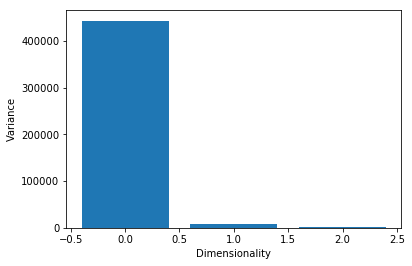

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
n=3 # how many eigenvectors we choose
pca = PCA(n)
Xproj = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
print (pca.explained_variance_ratio_)
plt.bar(np.arange(n), eigenvalues)
plt.xlabel("Dimensionality")
plt.ylabel("Variance")
plt.show()

In [13]:
pca.explained_variance_ratio_.sum()

0.99977867211918714

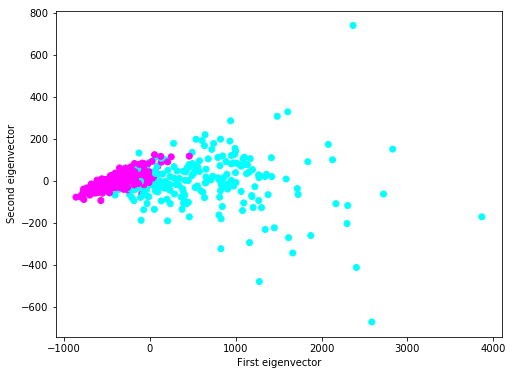

In [14]:
plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, cmap=plt.cm.cool)
plt.xlabel('First eigenvector')
plt.ylabel('Second eigenvector')
plt.show()